In [5]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [10]:
library(dplyr)
library(ggplot2)
library(ggpubr)
library(tidyverse)
library(broom)


In [3]:
data <- read.csv(file="stcp-Rdataset-Diet.csv")
head(data)
summary(data)
data_ = data %>%
  mutate(weight_loss = pre.weight - weight6weeks)
data_$weight_loss

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,25,NA,41,171,60,2,60.0
2,26,NA,32,174,103,2,103.0
3,1,0,22,159,58,1,54.2
4,2,0,46,192,60,1,54.0
5,3,0,55,170,64,1,63.3
6,4,0,33,171,64,1,61.1


     Person          gender            Age            Height     
 Min.   : 1.00   Min.   :0.0000   Min.   :16.00   Min.   :141.0  
 1st Qu.:20.25   1st Qu.:0.0000   1st Qu.:32.25   1st Qu.:164.2  
 Median :39.50   Median :0.0000   Median :39.00   Median :169.5  
 Mean   :39.50   Mean   :0.4342   Mean   :39.15   Mean   :170.8  
 3rd Qu.:58.75   3rd Qu.:1.0000   3rd Qu.:46.75   3rd Qu.:174.8  
 Max.   :78.00   Max.   :1.0000   Max.   :60.00   Max.   :201.0  
                 NA's   :2                                       
   pre.weight          Diet        weight6weeks   
 Min.   : 58.00   Min.   :1.000   Min.   : 53.00  
 1st Qu.: 66.00   1st Qu.:1.000   1st Qu.: 61.85  
 Median : 72.00   Median :2.000   Median : 68.95  
 Mean   : 72.53   Mean   :2.038   Mean   : 68.68  
 3rd Qu.: 78.00   3rd Qu.:3.000   3rd Qu.: 73.83  
 Max.   :103.00   Max.   :3.000   Max.   :103.00  
                                                  

[1]  0.0  0.0  3.8  6.0  0.7  2.9  2.8  2.0  2.0  8.5  1.9  3.1  1.5  3.0  3.6
[16]  0.9 -2.1  2.0  1.7  4.3  7.0  0.6  2.7  3.6  3.0  2.0  4.2  4.7  3.3 -0.5
[31]  7.0  5.6  3.4  6.8  7.8  5.4  6.8  7.2  7.0  7.3  0.9  7.6  4.1  6.3  5.0
[46] -0.6  1.1  4.5  4.1  9.0  2.4  3.9  3.5  5.1  3.5  4.2  2.4  5.8  3.5  5.3
[61]  1.7  5.4  6.1  7.9 -1.4  4.3  2.5  0.9  3.5  0.5  2.8  8.6  4.5  2.8  4.1
[76]  5.3  9.2  6.1

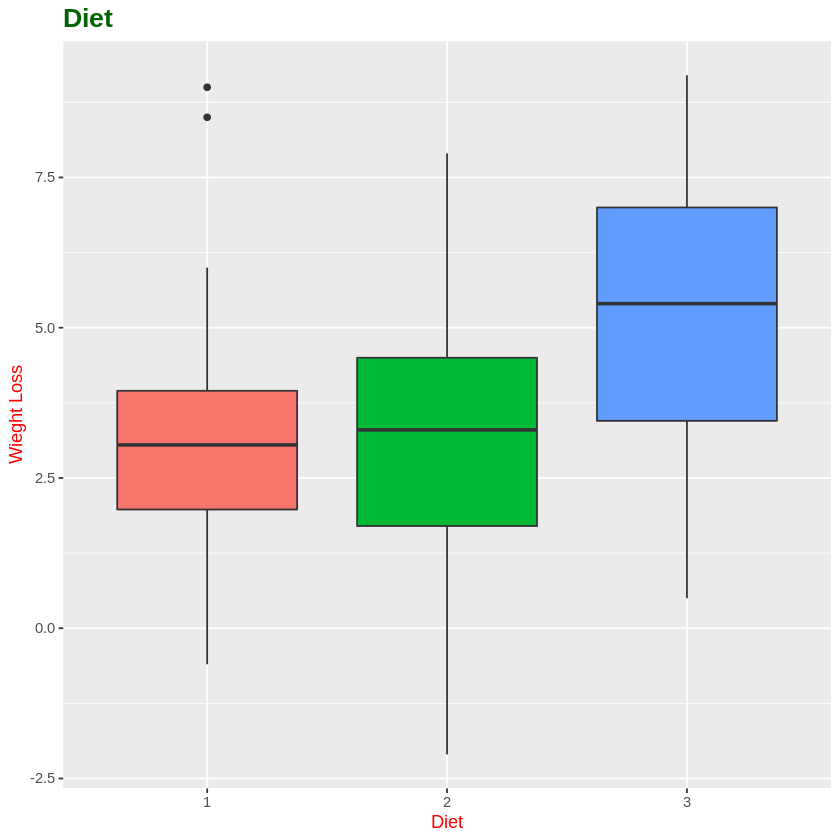

In [7]:
data_$Diet = as.character(data_$Diet)
ggplot(data = data_, mapping = aes(x = Diet, y = weight_loss) ) + 
  geom_boxplot(mapping = aes(fill = Diet) ) +
  theme(legend.position="none")+
  labs(x = "Diet", y = "Wieght Loss", fill ='red', 
       title = "Diet") + 
  theme(plot.title = element_text(size=16,color="darkgreen",face="bold"),
        axis.title.x = element_text(color = "red"),
        axis.title.y = element_text(color = "red"))


In [8]:

one.way <- aov( weight_loss ~ Diet, data = data_)

summary(one.way)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Diet         2   71.1   35.55   6.197 0.00323 **
Residuals   75  430.2    5.74                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [9]:
diet_loss_mean = mean(data_$weight_loss)
diet1_loss <- data_$weight_loss[data_$Diet == '1']
diet2_loss <- data_$weight_loss[data_$Diet == '2']
diet3_loss <- data_$weight_loss[data_$Diet == '3']

diet1_loss_mean <- mean(diet1_loss)
diet2_loss_mean <- mean(diet2_loss)
diet3_loss_mean <- mean(diet3_loss)
SSW1 <- sum((diet1_loss - diet1_loss_mean)**2)
SSW2 <- sum((diet2_loss - diet2_loss_mean)**2)
SSW3 <- sum((diet3_loss - diet3_loss_mean)**2)
SSB1 <- (diet1_loss_mean - diet_loss_mean)**2*length(diet1_loss)
SSB2 <- (diet2_loss_mean - diet_loss_mean)**2*length(diet2_loss)
SSB3 <- (diet3_loss_mean - diet_loss_mean)**2*length(diet3_loss)

sum_W <- SSW1 + SSW2 + SSW3
SST <- sum((data_$weight_loss - diet_loss_mean)**2)
ssb <- SST - sum_W
sum_B <- SSB1 + SSB2 + SSB3

ssb_df <- 3 -1
ssw_df <- length(data_$weight_loss) - 3
F_stat <- (sum_B/ssb_df)/(sum_W/ssw_df)
F_stat

[1] 6.197447

Results from R library and From scratch is same.

In [21]:
pf(6.197,2,75,lower.tail=FALSE)

[1] 0.003230254

As we can see our p value is below significance level therefor we reject null hypothesis.

In [28]:
t.test(diet1_loss,diet2_loss, paired = FALSE, var.equal = FALSE,
      conf.level = 0.95, alternative = c("two.sided"))


	Welch Two Sample t-test

data:  diet1_loss and diet2_loss
t = 0.41089, df = 49, p-value = 0.6829
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.066364  1.614512
sample estimates:
mean of x mean of y 
 3.300000  3.025926 


In [35]:
t.test(diet3_loss,diet2_loss, paired = FALSE, var.equal = FALSE,
       conf.level = 0.95, alternative = "two.sided")


	Welch Two Sample t-test

data:  diet3_loss and diet2_loss
t = 3.1693, df = 51.86, p-value = 0.002563
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.778469 3.465975
sample estimates:
mean of x mean of y 
 5.148148  3.025926 


In [29]:
t.test(diet1_loss,diet3_loss, paired = FALSE, var.equal = FALSE,
       conf.level = 0.95, alternative = c("two.sided"))


	Welch Two Sample t-test

data:  diet1_loss and diet3_loss
t = -2.8462, df = 48.862, p-value = 0.00645
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.1531357 -0.5431606
sample estimates:
mean of x mean of y 
 3.300000  5.148148 
